  ---

  
 # <span style="color:MediumSlateBlue     ">Final Project | Explainer Notebook.</span>

 ## <span style="color:MediumSlateBlue     ">Part 02 - Data Analysis 01.</span>


<span style="color:MediumSlateBlue     ">**02806 Social data analysis and visualization**</span>

<span style="color:MediumSlateBlue     ">**May 2021**</span>

<span style="color:MediumSlateBlue     "> **Data-sets Reference: Motor-Vihecle-Collisions<sup>[link](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95)</sup>, Weather-Data<sup>[link](https://www.ncdc.noaa.gov/cdo-web/search)</sup>, Speed-Limit-Data<sup>[link](https://data.cityofnewyork.us/Transportation/VZV_Speed-Limits/7n5j-865y)**</sup></span>

  ---
  

  
<span style="color:Orange">**Please note!**</span> If you are using Jupyter to display this ".ipynb" file You might need to make it *Trusted* in order to let Jupyter render the plots.
   

---

# <span style="color:MediumSlateBlue">Motivation.</span>

---

## What is your dataset?
NYC Motor Vehicle Collisions - Crashes<sup>[link](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95)</sup>. It's freely available and has well defined Spatio-temporal information, as well as casualties and damages related features. Additionally, We will also consider the corresponding Weather<sup>[link](https://www.ncdc.noaa.gov/cdo-web/search)</sup> and Speed-Limit Data<sup>[link](https://data.cityofnewyork.us/Transportation/VZV_Speed-Limits/7n5j-865y)</sup></span>.



## Why did you choose this/these particular dataset(s)?
Vehicle crashes happen daily around the globe. 
They, for example, cost the New York City economy an enormous amount of $4 billion per year <sup>[link](https://nypost.com/2015/03/20car-accidents-cost-nyc-nearly-4-billion-a-year/)</sup></span>. Thus, it's might be beneficial to invistigate the chossen data to learn more about this phenomena and analyse the core reasons and contributing factors behind those accidents.

## What was your goal for the end user's experience?
To give the end user the ability to investigate the data in an intractive way, where they can learn and build there own assumptions about this phenomena based on strong statistical analysis and visulizations.

---

# <span style="color:MediumSlateBlue">Genre:</span>

---

## Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?

For the **Visual Narrative** and accordingly to the Segal and Heer paper (Fig. 7) the following tools are used from each of the 3 categories **Visual Structuring, Highlighting and Transition Guidance**;

1. Regarding the **Visual Structuring**, "the mechanisms that communicate the overall structure of the narrative to the viewer and allow him to identify his position within the larger organization of the visualization", for the site the tool that used visually is the **Progress bar/Timebar**. Specifically, the storytelling is summarized in bubbles in the site that have a progress/continuity. The subcategories are [..]. The user can freelly click the bubble that they want to elaborate and the analysis will popup.


2. For the **Highlighting**, "the visual mechanisms that help direct the viewer's attention to particular elements in the display", there are used **Feature Distinctions** where we portait key features for the Data Exploration as well as Machine Learning Parts. For the map plots the we have **Zooming**. We wanted the reader to be able to investigate the collisions himself and express his curiosity.



3. For the **Transition Guidance**, "move within or between visual scenes without disorienting the viewer", we use **Object Continuity**. 

## Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

For the **Narrative Structure** the following tools are used from each of the 3 categories **Ordering, Interactivity and Messaging**; 

1. For **Ordering**, "the ways of arranging the path viewers take through the visualization", we use a **User Directed Path** where the user is free to navigate the prefered way. We wanted the user to have multiple ways of navigating and easily start from the topics that he wants to. 


2. For **Interactivity**, "the different ways a user can manipulate the visualization and how the user learns those methods", a list of tools are used. In our Bokeh plot we have **Hover Highlighting / Details** and **Filtering / Selection / Search**. The freedon of these tools allow the user to investigate the individual/preferred vehicle types and the contributing factors.


3. In **Messaging**, "the ways a visualization communicates observations and commentary to the viewer", we used **Captions/ Headlines** and **Summary** as it is organised way in depicting the different insights and summarize conlusions.


---

# <span style="color:MediumSlateBlue">Import needed libraries:</span>

---


In [1]:
""" IPython """
from IPython.display import display
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

""" Data Handeling """
import numpy as np 
import pandas as pd 
from pandas import set_option
import calendar
import os 

""" for warnings """
import warnings 
warnings.simplefilter("ignore")

""" Plot """ 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import folium
from bokeh.io import show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.models import FactorRange
from bokeh.models import Legend
from bokeh.plotting import figure
from bokeh import palettes
from bokeh.resources import CDN
from bokeh.embed import file_html
output_notebook() # open the bokeh viz on the notebook.

Loading BokehJS ...


---

# <span style="color:MediumSlateBlue">Load Final Data:</span>

---


In [2]:
""" Path """
fileName = 'MVC_SL_W_Final.csv'
filePath = os.path.abspath(os.path.join(os.getcwd(), fileName))

""" Load """
Data =  pd.read_csv(filePath, index_col=0);

""" Focus Factors & Vehicle """
Focus_Factors_Types = list(set(list(Data['CONTRIBUTING FACTOR VEHICLE 1'].unique()) + list(Data['CONTRIBUTING FACTOR VEHICLE 2'].unique())))
Focus_Vehicle_Types = list(set(list(Data['VEHICLE TYPE CODE 1'].unique()) + list(Data['VEHICLE TYPE CODE 2'].unique()))) 

---

# <span style="color:MediumSlateBlue">Basic Stats:</span>

---

In these sections some basic stats are presented and some key findings are depicted. Later on these findings are visualized in the next section.

## Summary Statistics:

**Key insights from categorical features**:

- The number of collisions in the 7 year interval (2013-2020) is **958,371** motor vehicle crashes in the New York City.


- Most crashes happened on 21st Jan 2014. After some research we find out that there as an [East Coast Storm with extensive Snow and Disruptions to the New York Region](https://www.nytimes.com/2014/01/22/nyregion/east-coast-snowstorm-takes-aim-at-new-york-region.html) mentioning that "“It is dangerous to cross the street with cars slipping and sliding”. You can see a [video](https://www.youtube.com/watch?v=8B2o82V68dw) about it.


- **BROOKLYN** is the borough with the most collisions.

**Key insights from numerical features**:

- Most crashes happened in **2015**.


- Most collisions happen on average in **September** month, around **4PM on the 13th day of the month**. 


The findings relate to the visualization depicted later on.

In [3]:
""" for categorical features """
Desc_O = Data.select_dtypes(include=object).describe()
display(Desc_O)

""" Free Memory """
del(Desc_O)

CRASH DATE CRASH TIME   BOROUGH ON STREET NAME  \
count       958371     958371    753698         958371   
unique        2922       1440         5           5994   
top     01/21/2014      16:00  BROOKLYN       broadway   
freq           735      13944    234246          12385   

       CONTRIBUTING FACTOR VEHICLE 1 CONTRIBUTING FACTOR VEHICLE 2  \
count                         958371                        958371   
unique                            21                            21   
top                      unspecified                   unspecified   
freq                          363684                        699389   

          VEHICLE TYPE CODE 1    VEHICLE TYPE CODE 2 Day of week  
count                  958371                 958371      958371  
unique                     12                     12           7  
top     sport utility vehicle  sport utility vehicle      Friday  
freq                   296845                 231246      152943

In [4]:
""" for non-object features """
Desc_N = Data.select_dtypes(exclude=object).describe()
Desc_N.loc['range'] = Desc_N.loc['max'] - Desc_N.loc['min']
Desc_N = Desc_N.append( Data.select_dtypes(exclude=object)
                            .mode()
                            .rename({0: 'mode'}, axis='index'))
set_option('precision', 2)
display(Desc_N)

""" Free Memory """ 
del(Desc_N)

ZIP CODE   LATITUDE  LONGITUDE  NUMBER OF PERSONS INJURED  \
count  753547.00  958371.00  958371.00                  958371.00   
mean    10846.50      40.72     -73.92                       0.28   
std       557.85       0.08       0.23                       0.68   
min     10000.00      40.50    -201.36                       0.00   
25%     10306.00      40.67     -73.98                       0.00   
50%     11207.00      40.72     -73.93                       0.00   
75%     11249.00      40.77     -73.87                       0.00   
max     11697.00      40.91     -32.77                      43.00   
range    1697.00       0.41     168.59                      43.00   
mode    11207.00      40.86     -73.91                       0.00   

       NUMBER OF PERSONS KILLED   Response       Year      Month        Day  \
count                  9.58e+05  958371.00  958371.00  958371.00  958371.00   
mean                   1.03e-03       0.21    2016.18       6.60      15.62   
std                    3.34e-02       0.41       2.17       3.46       8.75   
min                    0.00e+00       0.00    2013.00       1.00       1.00   
25%                    0.00e+00       0.00    2014.00       4.00       8.00   
50%                    0.00e+00       0.00    2016.00       7.00      16.00   
75%                    0.00e+00       0.00    2018.00      10.00      23.00   
max                    4.00e+00       1.00    2020.00      12.00      31.00   
range                  4.00e+00       1.00       7.00      11.00      30.00   
mode                   0.00e+00       0.00    2015.00      10.00      13.00   

            Hour     Minute  SPEED LIMIT MODE  PRECIPITATION  SNOW FALL  \
count  958371.00  958371.00         958371.00      958371.00  958371.00   
mean       13.41      24.27             26.50           0.15       0.11   
std         5.60      17.98              5.59           0.38       0.85   
min         0.00       0.00              0.00           0.00       0.00   
25%        10.00       8.00             25.00           0.00       0.00   
50%        14.00      25.00             25.00           0.00       0.00   
75%        18.00      40.00             25.00           0.07       0.00   
max        23.00      59.00             50.00           4.97      27.30   
range      23.00      59.00             50.00           4.97      27.30   
mode       16.00       0.00             25.00           0.00       0.00   

       SNOW DEPTH  FOG, SMOKE OR HAZE  AVERAGE WIND SPEED  \
count   958371.00           958371.00           958371.00   
mean         0.45                0.41                4.83   
std          2.06                0.49                2.62   
min          0.00                0.00                0.00   
25%          0.00                0.00                3.13   
50%          0.00                0.00                4.70   
75%          0.00                1.00                6.26   
max         22.00                1.00               18.34   
range       22.00                1.00               18.34   
mode         0.00                0.00                0.00   

       MAXIMUM TEMPERATURE  MINIMUM TEMPERATURE  
count            958371.00            958371.00  
mean                 63.30                49.19  
std                  18.53                17.18  
min                  13.00                -1.00  
25%                  48.00                36.00  
50%                  65.00                50.00  
75%                  80.00                65.00  
max                  98.00                83.00  
range                85.00                84.00  
mode                 83.00                68.00

## Some interesting counts:

- The number of persons injured from 2013 to 2020 are **123k**


- The number of deaths happened are **983 deaths**


- The **serious accidents** (meaning accidents that included injury or even a death) are **200k**


- The **non-serious accidents** are much more around **758K**. 

In [5]:
""" Number of MVC injured persons 2013 - 2020 """
Data['NUMBER OF PERSONS INJURED'].sum()

271271.0

In [6]:
""" Number of MVC killed persons 2013 - 2020 """
Data['NUMBER OF PERSONS KILLED'].sum()

983.0

In [7]:
""" Number Respone since 2013 - 2020 """
Data['Response'].sum()

200134

In [8]:
""" Number of No-Respone since 2013 - 2020 """
(Data['Response'] == 0).sum()


758237

 
---

# <span style="color:MediumSlateBlue">Data Analysis and Visulization:</span>

---

In this section we depicting different plots that will help us visually understand the case. The comments are written above and each of every plot.

## Box and whisker plots

In [9]:
""" For MVC Data """
Box_lst = ['ZIP CODE', 'LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED', 'Response', 'Year', 'Month', 'Hour','Minute']
Data[Box_lst].plot(
                kind='box', 
                subplots=True, 
                sharex=False, 
                sharey=False, 
                fontsize=10, 
                layout=(4,3), 
                figsize=(10,7),
                title='Box-Plot for MVC data'
                );
plt.savefig('Box_plot_MVC_Data_')
plt.close()

![image info](https://www.dropbox.com/s/bg1sqzxq4xhq6ur/Box_plot_MVC_Data.png?dl=1)

**Comments**:

Above we see the Blox-plots for Motor Vehicle Collisions (MVC) data;

- We see some variation on the `LATITUDE` (y-axis) and no variation on `LONGITUDE` (x-axis) with some outliers.


- There are more Response of 0's (meaning non-serious accidents) than 1's (serious accidents).


- Mostly there are no number of persons injured neither killed.


- The **25% - 75% percentile** of the collisions happen on working hours. At 10 oclock until 19:00. This makes sense as it is the rush hour many people return from work. 


- The  **25% - 75% percentile** of collisions start **from April and end around October**.

In [10]:
""" For Speed Limits and Weather data """
Box_lst = ['SPEED LIMIT MODE', 'PRECIPITATION', 'SNOW FALL','SNOW DEPTH', 'FOG, SMOKE OR HAZE', 'AVERAGE WIND SPEED','MAXIMUM TEMPERATURE', 'MINIMUM TEMPERATURE']
Data[Box_lst].plot(
                kind='box', 
                subplots=True, 
                sharex=False, 
                sharey=False, 
                fontsize=10, 
                layout=(3,3), 
                figsize=(10,7),
                title='Box-Plot for Speed Limits and Weather data'
                );
plt.savefig('Box_plot_SP_W_Data_')
plt.close()

""" Free Memory """ 
del(Box_lst)

![image info](https://www.dropbox.com/s/tiqj6ipn8cx2zf8/Box_plot_SP_W_Data.png?dl=1)

**Comments:**

Above we see the Blox-plots for Speed Limits as well as Weather data;

1. The median speed is 25 MPH.
2. Usually we have no precipitation (rain) or snow.
3. The median maximum temperature is around 60 fahrenheit and the median minimum is at around 50.

## Respone over Years - Plot

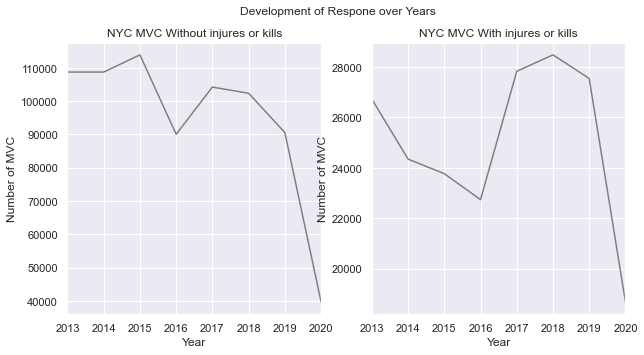

In [11]:
grouping = Data.groupby(['Response','Year']).count()['CRASH DATE']

fig, axs = plt.subplots(1, 2,figsize=(10, 5))
fig.suptitle('Development of Respone over Years')

axs.flat[0].set_title('NYC MVC Without injures or kills')
axs.flat[0].set_ylabel('Number of MVC')
grouping[0].plot(ax=axs.flat[0], color= 'tab:gray')    

axs.flat[1].set_title('NYC MVC With injures or kills')
grouping[1].plot(ax=axs.flat[1], color= 'tab:gray')    
axs.flat[1].set_ylabel('Number of MVC')

plt.show;

""" Free Memory """ 
del(grouping)

**Comments:**

Above we see the Responses **(Non-Serious vs Serious accidents)** thoughout the years 2013 to 2020. 

- First, we realise the dramatic decrease of the accidents in total in 2020 due to the **COVID global pandemic**.


- In 2015, we see that even though we see a peak at non-serious collisions at 2015, actually the serious collisions aren't that much! Actually 2015 is the third year with the least amount of serious collisions (after 2020 and 2016).


- In **2016 we see an overall decrease in both serious and non serious collisions**. Actually, removing the 2020 (due to the global pandemic that is a special situation) **2016 is the year with the least collisions**.


- **In 2018 and 2019 the serious collisions in New York City actually skyrocket** peaking at 2018 with more than 28,000 serious accidents. 

## Correlation Matrix Plot

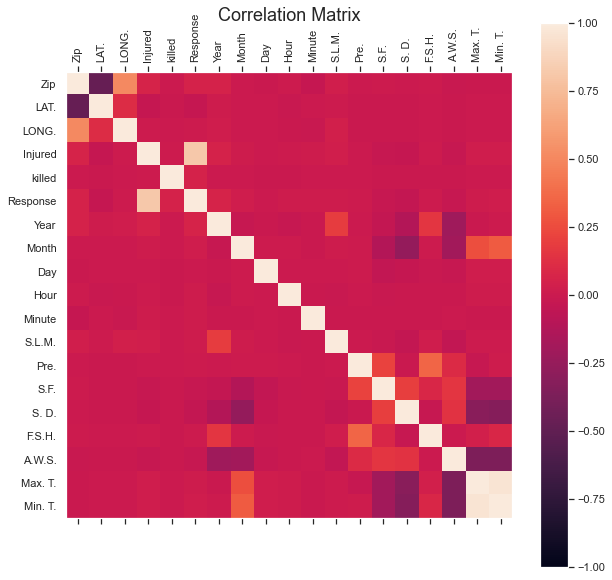

In [18]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(Data.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,len(Data.select_dtypes(exclude=object).columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(['Zip', 'LAT.', 'LONG.', 'Injured','killed', 'Response', 'Year', 'Month', 'Day', 'Hour','Minute', 'S.L.M.', 'Pre.', 'S.F.','S. D.', 'F.S.H.', 'A.W.S.','Max. T.', 'Min. T.'], rotation=90)
ax.set_yticklabels(['Zip', 'LAT.', 'LONG.', 'Injured','killed', 'Response', 'Year', 'Month', 'Day', 'Hour','Minute', 'S.L.M.', 'Pre.', 'S.F.','S. D.', 'F.S.H.', 'A.W.S.','Max. T.', 'Min. T.'], rotation=0)
plt.grid(False)
plt.title('Correlation Matrix', y=+1.1, fontsize=18)
plt.show()


""" Free Memory """ 
del(ax, cax)

**Comments**:

Above we see the correlation matrix of our features. Key insights;

- Speed Limit Mode is kind of related to Year. This is validated because "On November 7, 2014, New York City’s default speed limit was changed from 30 mph to 25 mph." [Source](https://data.cityofnewyork.us/Transportation/VZV_Speed-Limits/7n5j-865y)


- Fog, Snow and Haze is related to Rainfall and Years. This seems logical as some years might have rougher winters. As in the case of 2014 we mentioned before. [Read this arcticle from New York Times.](https://www.nytimes.com/2014/01/22/nyregion/east-coast-snowstorm-takes-aim-at-new-york-region.html)


- Wind Speed is related with Snow Fall and Rain Fall.


- Maximum and Minimum temperatures are correlated.

## Jitter-plots:

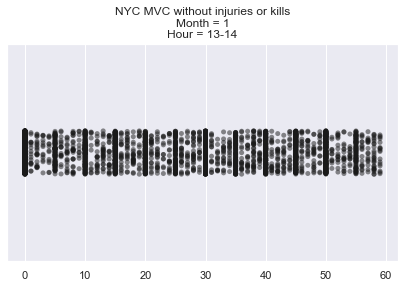

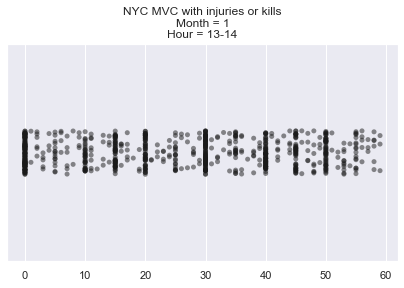

In [19]:
""" Init filtered data for Jitter plotS """ 
month = 1
hour = 13

""" Jitter plot 01 : No-Response """
data_Jit = Data[Data['Response']==0] 
data_Jit = data_Jit[data_Jit['Month']==month]
data_Jit = data_Jit[data_Jit['Hour']==hour].reset_index(drop=True)
plt.figure(figsize=(7, 4))
sns.stripplot(data_Jit['Minute'].values, jitter=True, edgecolor='none', alpha=.50 ,color='k')
plt.title('NYC MVC without injuries or kills\nMonth = '+ str(month) + '\nHour = ' + str(hour) + '-'+ str(hour+1))
plt.show()

""" Jitter plot 02 : With-Response """
data_Jit = Data[Data['Response']==1] 
data_Jit = data_Jit[data_Jit['Month']==1]
data_Jit = data_Jit[data_Jit['Hour']==13]
plt.figure(figsize=(7, 4))
sns.stripplot(data_Jit['Minute'].values, jitter=True, edgecolor='none', alpha=.50 ,color='k')
plt.title('NYC MVC with injuries or kills\nMonth = '+ str(month) + '\nHour = ' + str(hour) + '-'+ str(hour+1))
plt.show()

""" free memory """
del(data_Jit)

**Comments**:

The figure above shows a jitter-plot of New York City Collisions in January, with collisions with/ without injuries/kills 2003-2017 between 13.00 - 14.00.

The pattern of **non-injuries/kills is much busier** that the lethal car accidents. This makes sense. 

We also observe a high amount of accident being registered only at intervals of 10 mins (the officers rounded up the numbers to simplify the time) but the are also other **lethal accidents** that **depict the exact minute**.

##  Histogram-Plots:

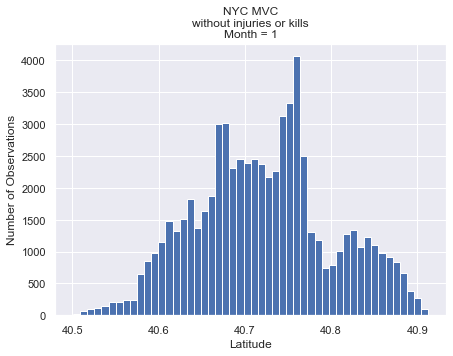

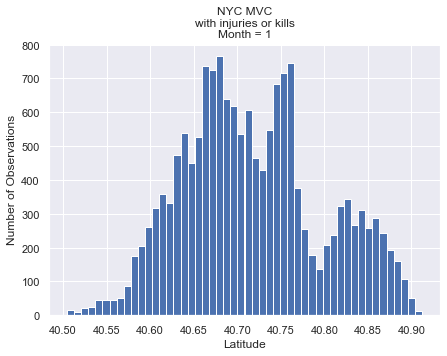

In [20]:
""" Init filtered data for histogram plot """ 
month = 1

""" histogram 01: No-Respone """
data_Hist = Data[Data['Response']==0]
data_Hist = data_Hist[data_Hist['Month'] == month]
plt.figure(figsize=(7, 5))
plt.hist(data_Hist['LATITUDE'],bins= 50) 
plt.title("NYC MVC\nwithout injuries or kills\nMonth = " + str(month))
plt.xlabel("Latitude")
plt.ylabel("Number of Observations")
plt.show()                      

""" histogram 02: With-Respone """
data_Hist = Data[Data['Response']==1]
data_Hist = data_Hist[data_Hist['Month'] == month]
plt.figure(figsize=(7, 5))
plt.hist(data_Hist['LATITUDE'], bins=50) 
plt.title("NYC MVC\nwith injuries or kills\nMonth = " + str(month))
plt.xlabel("Latitude")
plt.ylabel("Number of Observations")
plt.show()

""" free memory """
del(data_Hist)

**Comments:**

The above are **histograms** that show the latitude distribution of the two responses in only January from 2013 until 2020 using 50 bins.

It can be seen that the two crimes histograms shows **mixed Gaussian** spatio-temporal distributions (January & latitude), excluding the high peak noise/outliers.

 ## Map-plot:

In [21]:
""" Init filtered data for map plot """ 
select_month    = 1
start_year      = 2020
end_year        = 2021
start_hour = 12  
end_hour = 18

""" Map data """
data_Map = Data[
            (Data['Month'] == select_month) &
            (Data['Year'] >= start_year) &
            (Data['Year']  < end_year) &
            (Data['Hour'] >= start_hour) &
            (Data['Hour']  < end_hour)
            ].reset_index(drop=True).loc[:,['CRASH DATE', 'CRASH TIME', 'LATITUDE','LONGITUDE','Response']]

""" Create a NYC Map instances """
MapNYC = folium.Map(
            location = [40.730610, -73.935242], 
            tiles = 'Stamen Toner',
            zoom_start = 12)

""" Add Marker for the City Hall to Map"""
folium.Marker(
    location = [40.712772, -74.006058],
    popup = 'City Hall',
    icon = folium.Icon( 
                color='blue',
                icon='university',
                prefix='fa')).add_to(MapNYC)

""" Start adding points """
for i, row in data_Map.iterrows():
    if(row['Response']==1):
        folium.CircleMarker(
            location = [row['LATITUDE'], row['LONGITUDE']],
            radius=1,
            popup='Either Injure or Kill Occurred\nin ' + str(row['CRASH DATE']) +"\nat " + str(row['CRASH TIME']),
            color='red',
            opacity=0.5).add_to(MapNYC)

    else:
        folium.CircleMarker(
            location = [row['LATITUDE'], row['LONGITUDE']],
            radius=1,
            popup='Neither Injure nor Kill Occurred\nin ' + str(row['CRASH DATE']) +"\nat " + str(row['CRASH TIME']),
            color='blue',
            opacity=0.5).add_to(MapNYC)

""" Display Map"""
display(MapNYC)

""" Free memory """
del(data_Map, MapNYC)

**Comments:**

The above field gives the user the ability to pick a collision and display its incidents on the map **for a selected period, specified with a Start and End Date**. 

We chose to visualize the **serious/lethal collisions with red** and the **non-serious collisions with blue** in New York City for the month of **January 2020**.

We observe that the **Central Park/ Manhattan** in general is very heavy in collisions and also for **Brooklyn**. 

We also, see the number of **non-serious collisions (blue)** is much bigger than the **serious/lethal ones**.

 ## Bokeh-Plot:

 Define a general **Bokeh-plot function**, for all Contributing Factors and Vehicle Types:

In [22]:
def Bokeh_plot(plotMe):
    # Function Descreption:  
    """
    Bokeh_plot(plotMe): 
        # A general Bokeh-plot function, for all Contributing Factors and Vehicle Types.
        # Takes plotMe:String, with one of the corresponding possible values: 
            - 'VEHICLE TYPE CODE 1'
            - 'VEHICLE TYPE CODE 2'
            - 'CONTRIBUTING FACTOR VEHICLE 1'
            - 'CONTRIBUTING FACTOR VEHICLE 2'
        # Returns:
            Bokeh plot or Error for invalid PlotMe value
    """

    # Check parameter values: 
    if not( (plotMe == 'VEHICLE TYPE CODE 1') | 
            (plotMe == 'VEHICLE TYPE CODE 2') |
            (plotMe == 'CONTRIBUTING FACTOR VEHICLE 1') | 
            (plotMe == 'CONTRIBUTING FACTOR VEHICLE 2')
        ): # Notice the sad face, COOL! 
        raise TypeError(
            "Not allowed parameter value for 'plotMe' in function 'Bokeh_plot'\n" +
            "The allowed parameter values are:\n" +
            "   - 'VEHICLE TYPE CODE 1'\n" +
            "   - 'VEHICLE TYPE CODE 2'\n" +
            "   - 'CONTRIBUTING FACTOR VEHICLE 1'\n" +
            "   - 'CONTRIBUTING FACTOR VEHICLE 2'\n"
        )

    # Define parameter corresponding Focus list:
    Focus = []
    if ((plotMe == 'VEHICLE TYPE CODE 1') | (plotMe == 'VEHICLE TYPE CODE 2')):
        Focus = Focus_Vehicle_Types
    else:
        Focus = Focus_Factors_Types

    # Define parameter corresponding Figure height and width:
    plot_height,plot_width = 0,0 
    if ((plotMe == 'VEHICLE TYPE CODE 1') | (plotMe == 'VEHICLE TYPE CODE 2')):
        plot_height=400
        plot_width=800
    else:
        plot_height=550
        plot_width=800

    # Pivot Data (Table) for Bokeh:
    Table = pd.pivot_table(Data, 
                        index = 'Hour', 
                        columns = plotMe,
                        values = 'CRASH DATE',
                        aggfunc = 'count')

    # Normalize: (div by sum)
    Table = Table.div(Table.sum(axis=0), axis=1)

    # Add Hour column (We need Hour it for Bokeh)
    Table['Hours']=Table.index

    # Convert data to bokeh data 
    source = ColumnDataSource(Table)

    # Create an Empty Bokeh Figure.
    """ first, define x_range. It should be FactorRange of str(x_axis_values) """
    x_range = list(map(str, Table['Hours'].values))  
    x_range = FactorRange(factors=x_range)

    """ then, create the figure """
    p = figure(x_range = x_range, 
            plot_height = plot_height,
            plot_width = plot_width,
            title='Hourly distribution of ' + plotMe.lower(),
            x_axis_label='Hour', 
            y_axis_label='Frequency'
            )
    
    # Loop to create a barplot for each label: 
    """ first, Define colors (one color for each label): """
    if ((plotMe == 'VEHICLE TYPE CODE 1') | (plotMe == 'VEHICLE TYPE CODE 2')):
        colors = palettes.Category20[20] 
    else:
        colors = palettes.Category20[20]
        colors.insert(15, '#000000')

    """ then,
    Define an empty list to store legend items. 
    The list contains tuples of label and the corresponding barplot list. 
    Syntax:[(label, [p.vbar]), ....]   
    This will be used later to extract legends using Legend function.
    """
    legend_items = []

    """ start looping """
    for i, label in enumerate(Focus):
        """ 
        p.vbar is a barplot of hour vs fraction. 
        For para see https://docs.bokeh.org/en/latest/docs/reference/plotting.html#bokeh.plotting.Figure.vbar  
        """
        vertical_bars  = p.vbar(x='Hours',  # x_axis (column name from Table), see Table['Hours']  
                        top=label,          # y_axis (column name from Table), see Table 
                        source=source,      # Table in Bokeh format 
                        width=0.9,          # width of each bar in vbar 
                        color=colors[i],    # color each label from the colors list
                        muted=True,         # Start the plot muted 
                        muted_alpha=0.005,  # Shadow of each barplot 
                        fill_alpha=1,       # how much to fill each bar in the barplot 
                        line_alpha=1)       # how much to fill the border of each bar in the barplot
        legend_items.append((label, [vertical_bars])) # store to legend_items list
        
    # Start the interactive figure p
    """ First, Extract legends, legends has the label name and info from the cor. barplot's info """
    legend = Legend(items=legend_items)

    """ Then, define legends' Place. """
    p.add_layout(legend, 'left')

    """ Define the click policy """
    p.legend.click_policy = 'mute'

    """ show """
    show(p)

    """ Return the HTML file """
    return (file_html(p, CDN, plotMe))

In [23]:
""" List that contains Bokeh HTML """
HTML = []

**Bokeh-plot: Vehicle Type Code 1**

In [24]:
HTML.append(Bokeh_plot('VEHICLE TYPE CODE 1'))

**Comments:**

The reader can investigate the interactive bookeh plots depicting the Hourly distribution of the vehicle type code 1's. 

Key insights;

- Most of the vehicle types hoursly distribution appear **Gaussian distributed**


- `Sedan`, `Bike`, `Passenger Vehicles` and `Sport Utility Vehicles` are close to normal distributions but a bit **skewed to the right.**


- `Taxi` looks like a **uniform distribution.**


- Finally, `Bus` is a **mixed-Gaussian** with a means at morning hours 7-8am and 3-4pm. The rush hours. 

**Bokeh-plot: Vehicle Type Code 2**

In [25]:
HTML.append(Bokeh_plot('VEHICLE TYPE CODE 2'))

**Comments:**

The reader can investigate the interactive bookeh plots depicting the Hourly distribution of the vehicle type code 2's.

- Most of the vehicle types hoursly distribution appear **Gaussian distributed**.


- `Sedan`, `Bike` and `Sport Utility Vehicles` appear normal distributed a bit **skewed to the right**.


- `Bus` maintains again a **mixed-Gaussian** with a means at morning hours 7-8am and 3-4pm. The rush hours. 

**Bokeh-plot: Contributing Factor Vehicle 1**

In [26]:
HTML.append(Bokeh_plot('CONTRIBUTING FACTOR VEHICLE 1'))

**Comments:**

The reader can investigate the interactive bookeh plots depicting the Hourly distribution of the contributing factors vehicle 1's.

- Most factors/distributions appear **Gaussian with a tendency for a right skweness.**


- **`Unsage Speed`** is a factor that occurs thoughout the hours of the day, thus it is **uniform distributed**


- **`Alcohol Involvement`** happens mainly at evening to morning hours. It looks like an **inversed Gaussian distribution**, known as Wald distribution

**Bokeh-plot: Contributing Factor Vehicle 2**

In [27]:
HTML.append(Bokeh_plot('CONTRIBUTING FACTOR VEHICLE 2'))

**Comments:**

The reader can investigate the interactive bookeh plots depicting the Hourly distribution of the contributing factors vehicle 1's.

- Most factors/distributions appear **Gaussian with a tendency for a right skewness.**


- **`Alcohol Involvement`** for contributing factor vehicle 2 is very unbalanced depicting a bit as a uniform distribution. This means the vehicle 2 driver many times throughout the day collide due to Alcohol Involvement.

 
---

# <span style="color:MediumSlateBlue">Clear All Variables:</span>

---


In [28]:
%reset -f